## Retail Data Analysis on Demographic and Spending Trends

After taking my very first economics course in my first semester of university, I developed an itch to apply what I had learn in class to the real world. In highschool, I had written research papers on subjects such as math, biology, chemistry and history, but never economics. As result, over the winter break, I found a dataset of US retail data on [kaggle.com](https://www.kaggle.com/datasets/abdurraziq01/retail-data/data), posted by Abdur Raziq Khan. This project will aim to process, visualize, analyze, and explain the data found in Khan's dataset using MySQL and Python. Specifically, the SQLAlchemy, Pandas, Matplotlib, Numpy, Seaborn, Plotly, and Geopandas libraries will be used to aid in analysis and visualization.
Feel free to access the data through the link and follow along. The bulk of my data processing will be done in MySQL, using databases and various tables.<br> Below, I am establishing a connection to the MySQL database, allowing me to create Pandas dataframes here on Jupyter Notebook and visualize the data using Matplotlib.

In [40]:
from sqlalchemy import create_engine, text
from dotenv import load_dotenv
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import geopandas as gpd


load_dotenv('SQLinformation.env')

db_host = os.getenv("MYSQL_HOST")
db_user = os.getenv("MYSQL_USER")
db_password = os.getenv("MYSQL_PASSWORD")
db_name = os.getenv("MYSQL_DATABASE")

# creating an engine to interact with the database
engine = create_engine(f"mysql+mysqlconnector://{db_user}:{db_password}@{db_host}/{db_name}")

# establishing connection with MySQL database
try:
    with engine.connect() as connection:
        print("Connected to MySQL database using SQLAlchemy")
except Exception as e:
    print("Error while connecting to MySQL:", e)

query = "SELECT * FROM retail_data"
retail_df = pd.read_sql(query, engine)
retail_df.head()        # displays the first 5 rows of the retail_df data frame

Connected to MySQL database using SQLAlchemy


,CustomerID,Age,Gender,AnnualIncome,SpendingScore,ProductCategory,ProductPrice,PurchaseDate,StoreID,StoreLocation,PaymentMethod,DiscountApplied,DiscountPercent,ProductCost,Profit,FootTraffic,InventoryLevel,MarketingExpenditure,CompetitorPrice
0,1,58,Male,60038,41,Health & Beauty,147.43,2022-06-11,46,San Jose,Credit Card,1.0,26,109.10,38.33,336,26,9107.90,171.55
1,2,57,Male,31577,91,Health & Beauty,402.09,2023-06-05,53,Los Angeles,Mobile Payment,1.0,1,398.07,4.02,491,32,1746.77,419.19
2,3,39,Female,117404,26,Groceries,958.45,2020-10-14,95,Philadelphia,Mobile Payment,0.0,0,958.45,0.00,157,3,2030.49,835.92
3,4,33,Male,87434,94,Electronics,544.17,2021-08-27,24,Dallas,Credit Card,0.0,0,544.17,0.00,223,87,6242.68,620.36
4,5,18,Male,90225,10,Health & Beauty,645.75,2023-06-06,2,San Antonio,Credit Card,0.0,0,645.75,0.00,315,8,6008.89,600.49


Let's start our analysis by looking at the three categories that are typically considered when we explore relationships with money: Age, AnnualIncome, and SpendingScore. For each of my analyses, I will create a new table in MySQL, load the data into a Pandas dataframe, and use Matplotlib & other libraries on Jupyter Notebook to visualize the data. The main reason behind creating unique MySQL tables is because sometimes the data needs to be altered/aggregated before analysis (i.e average price, total income), and it's easier to have everything on one MySQL database so I can see everything with a click of my mouse.
<br>The code below demonstrates the process of loading data from the newly created <b>WealthByAge</b> table on MySQL to a <b>Pandas dataframe</b> and <b>plotting it with Matplotlib</b>:

In [16]:
query = "SELECT * FROM WealthByAge"
wealthbyage_df = pd.read_sql(query, engine)
wealthbyage_df.head()

,Age,AvgIncome,AvgSpendingScore
0,18,86471.6634,50.5134
1,19,84943.5151,50.9835
2,20,83377.0000,51.3843
3,21,84595.7318,52.1596
4,22,86864.7089,49.9761


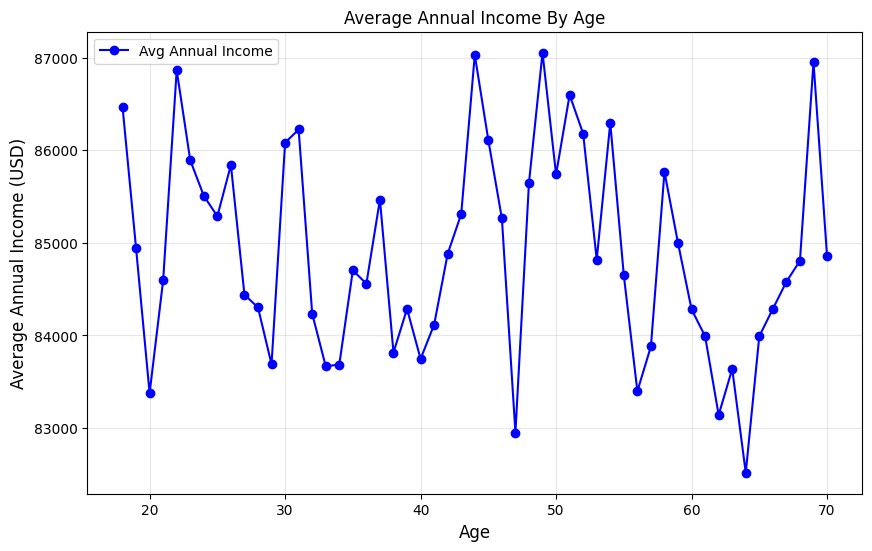

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(wealthbyage_df["Age"], wealthbyage_df["AvgIncome"], marker='o', linestyle='-',color='b', label="Avg Annual Income")

# Titles and labels
plt.title("Average Annual Income By Age", fontsize=12)
plt.ylabel("Average Annual Income (USD)", fontsize=12)
plt.xlabel("Age", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

From the graph alone, it is hard to determine any type of trend between Age and Average Annual Income. Average annual income seems to rise and fall periodically. The graph does tell us that Average Annual Income reaches a minimum of around \\$82,000 around 65, at least in this data set. On the other hand, the maximum Average Annual Income of the dataset occurs around the 42-49 age range, at an income of around \\$87,000. 
<br>Although we are able to deduce the maximum and minimum Average Annual Incomes of each age group, this graph is not very useful at detecting other trends. Thus, let's implement a mathematical concept known as a "rolling average". Rolling averages update the averages of a data set to include data in the set up until a specific point ([IBM](https://www.ibm.com/docs/el/cognos-analytics/11.1.0?topic=dimensionally-rolling-moving-averages)). For example, say you had 100 rows of data. Your first average could be the average of rows 1-5, then the next average would be of rows 2-6 etc, etc. 
<br>The rolling averages of annual income per age group were calculated in MySQL, using five rows at a time, and displayed below:

In [19]:
query = "SELECT * FROM RollingAvgIncomeByAge"
rollingincome_df = pd.read_sql(query, engine)
rollingincome_df.head()

,Age,AvgAnnualIncome,RollingAvgIncome
0,18,86471.6634,86471.663400
1,19,84943.5151,85707.589250
2,20,83377.0000,84930.726167
3,21,84595.7318,84846.977575
4,22,86864.7089,85250.523840


It's subtle, but we can already notice a difference in the numbers in the AvgAnnualIncome and RollingAvgIncome columns. Let's graph the numbers to visually understand the differences, and uncover any previously hidden trends.

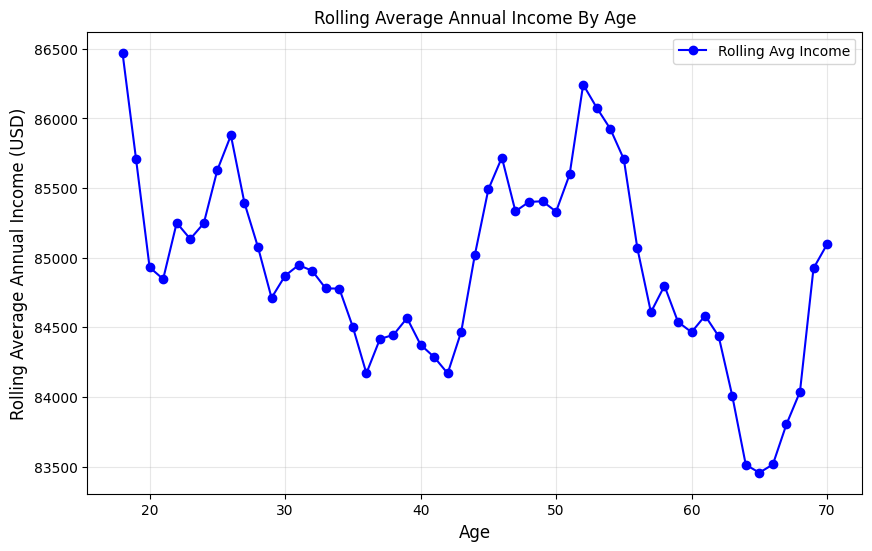

In [77]:
plt.figure(figsize=(10, 6))
plt.plot(rollingincome_df["Age"], rollingincome_df["RollingAvgIncome"], marker='o', linestyle='-',color='b', label="Rolling Avg Income")

# Titles and labels
plt.title("Rolling Average Annual Income By Age", fontsize=12)
plt.ylabel("Rolling Average Annual Income (USD)", fontsize=12)
plt.xlabel("Age", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

Right off the bat, this graph is much more visually informative than the previous one! We can see three major trends here. First, (rolling) average annual income displays a decreasing trend from ages 20-40. Then, at mid-life, on average, American households will experience an increase in average annual income. However, their increase starts to wane off as Americans enter their senior years, where they experience another decrease in average annual income until around 65. There are a few possible explanations for these trends:
1. <b>Ages 20-40</b>
<br>At these ages, many Americans could be focusing on their education or families. As a result, it's possible that many of them are not in the work force, or working at low-paying/entry-level jobs. 
2. <b>Ages 40-55</b>
<br>The increase seen in ages 40-55 could be because Americans of this age range are now starting to settle into their jobs. Many of them may have reached senior/managerial high level jobs, increasing their annual income.
3. <b>Ages 55-65</b>
<br>From ages 55-65, factors like health issues and retirement could be decreasing the income of individuals, forcing them to work lower paying jobs/not work at all.

<br> Through the use of rolling averages, we were able to uncover this interesting relationship between age and annual income. Since this dataset describes US retail data, let's take a closer look at the actual locations of the data. Using MySQL, we can isolate the StoreLocation column on the retail_data dataset. At the same time, we create a lookup table with each of cities found in retail_data and the abbreviation of the state they belong to. Then, using a JOIN, we can replace all the cities with their state abbreviations. This will come in handy soon. Moving to Jupyter Notebook, we can load the data into a dataframe and create a table with the frequencies of each state, as shown below.

In [47]:
query = "SELECT StoreLocation FROM store_locations"
location_df = pd.read_sql(query, engine)
state_count = location_df['StoreLocation'].value_counts().reset_index()
state_count.columns = ['State', 'Frequency']
print(state_count)

  State  Frequency
0    CA      11685
1    TX      11403
2    AZ       3887
3    IL       3781
4    PA       3767
5    NY       3690


Since we don't have exact coordinates of the purchases, we can use Plotly to make a "choropleth map". A choropleth map uses differences in shading/colour to represent different properties/values of those areas (Oxford Languages). In the figure above, we were able to aggregate the frequencies of each state, which is what we will show with colour changes on our choropleth map. The [geojson file](https://www.kaggle.com/datasets/pompelmo/usa-states-geojson/data) I'm using has been downloaded from Kaggle. This file has geographic information that defines the boundaries of the US states, which will be helpful when we merge the frequencies table with the geographic table. This creates a new table with state abbreviation, state name, geographical information, and frequency all together. All that's left to do after that is to plot the choropleth map with plotly!

In [50]:
us_states = gpd.read_file('us-states.json')
print(us_states.head())

   id        name                                           geometry
0  AL     Alabama  POLYGON ((-87.3593 35.00118, -85.60668 34.9847...
1  AK      Alaska  MULTIPOLYGON (((-131.60202 55.11798, -131.5691...
2  AZ     Arizona  POLYGON ((-109.0425 37.00026, -109.04798 31.33...
3  AR    Arkansas  POLYGON ((-94.47384 36.50186, -90.15254 36.496...
4  CA  California  POLYGON ((-123.23326 42.00619, -122.37885 42.0...


In [56]:
merged = us_states.set_index('id').join(state_count.set_index('State'))
clean_merged = merged.dropna(subset=['Frequency'])
print(clean_merged.head(6))

            name                                           geometry  Frequency
id                                                                            
AZ       Arizona  POLYGON ((-109.0425 37.00026, -109.04798 31.33...     3887.0
CA    California  POLYGON ((-123.23326 42.00619, -122.37885 42.0...    11685.0
IL      Illinois  POLYGON ((-90.63998 42.51006, -88.78878 42.493...     3781.0
NY      New York  POLYGON ((-73.34381 45.01303, -73.33285 44.804...     3690.0
PA  Pennsylvania  POLYGON ((-79.76278 42.25265, -79.76278 42.000...     3767.0
TX         Texas  POLYGON ((-101.81294 36.50186, -100.00008 36.5...    11403.0


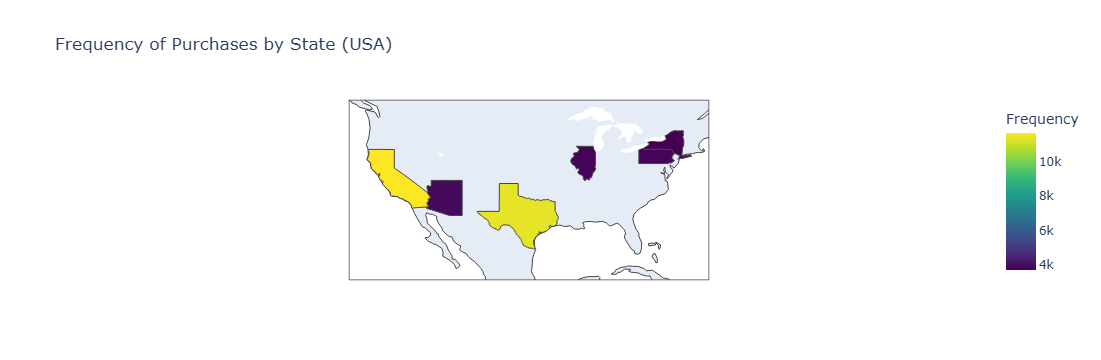

In [71]:
fig = px.choropleth(
    clean_merged, 
    geojson=clean_merged.geometry, 
    locations=clean_merged.index, 
    color="Frequency",
    title="Frequency of Purchases by State (USA)",
    hover_name="name",
    color_continuous_scale="Viridis"
)
fig.update_geos(
    fitbounds="locations", 
)
fig.show()

From the choropleth map, we can see that the most purchases occured in the west coast area, with California holding the maximum of 11.685k purchases. On the other hand, the north east corner of the US seems to make less purchases, with Illinois and Pensylvania combined barely reaching 8000 purchases.
Next, let's look at the relationships between gender and product category of item purchased. First, the genderproductcategory table is created on MySQL, counting the frequencies at which individuals of a certain gender purchased an item part of a specific product category. Then, the aggregated data is grouped & sorted by gender and product category. Then in Jupyter Notebook, we will take this table and transform it to be more useful to us for creating a bar chart.

In [67]:
query = "SELECT * FROM genderproductcategory"
gender_df = pd.read_sql(query, engine)
gender_df.head(12)

,Gender,ProductCategory,PurchaseFrequency
0,Female,Books,3182
1,Female,Clothing,3299
2,Female,Electronics,3159
3,Female,Groceries,3224
4,Female,Health & Beauty,3163
5,Female,Home & Kitchen,3184
6,Male,Books,3150
7,Male,Clothing,3073
8,Male,Electronics,3232
9,Male,Groceries,3167


In [72]:
# rearranging the set up of the table so now we have two groups for the bar chart: Female and Male
pivot_data = gender_df.pivot(index="ProductCategory", columns="Gender", values="PurchaseFrequency")
print(pivot_data)

Gender           Female  Male
ProductCategory              
Books              3182  3150
Clothing           3299  3073
Electronics        3159  3232
Groceries          3224  3167
Health & Beauty    3163  3176
Home & Kitchen     3184  3204


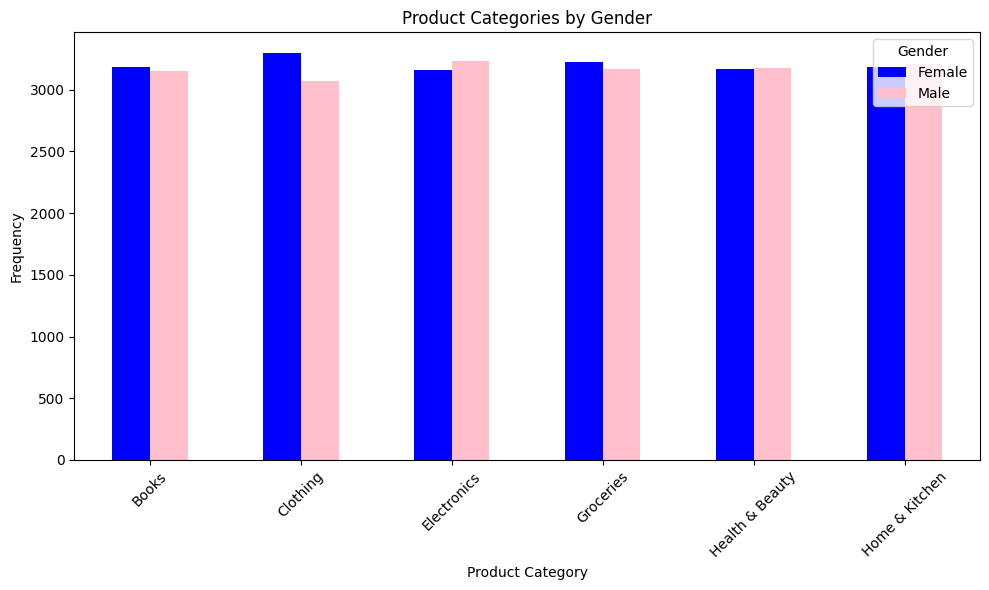

In [78]:
pivot_data.plot(kind="bar", figsize=(10, 6), color=["blue", "pink"])

# Title and labels
plt.title("Product Categories by Gender")
plt.ylabel("Frequency")
plt.xlabel("Product Category")
plt.xticks(rotation=45)  
plt.legend(title="Gender")  
plt.tight_layout() 
plt.show()

Perhaps surprisingly, the bars of men and women are quite equal! Traditionally, women are often correlated with clothing/health & beauty products. However, the bar chart tells us that women purchase those products just as regularly (if not less), than men. However, it is important to note that this bar chart does not tell us how much each gender is <b>spending</b> on each category. Even though the frequencies are similar, it's possible that one gender spends more money on a certain category than the other. This dataset does not provide us with the information needed to investigate this. 
<br>Moving to a less consumer focused perspective, let's consider the relationship between product cost, price, profit, and profit margin. However, it is important to understand these categories first before we dive into our analysis.
<br> According to indeed.com, [product cost](https://www.indeed.com/career-advice/career-development/product-cost-definitive-guide-example#:~:text=Product%20cost%20is%20an%20accounting,materials%2C%20labor%20and%20manufacturing%20overhead.) refers to the total costs involved in making a product and getting it ready for sale. Product price is how much a product is selling for, [profit](https://www.indeed.com/career-advice/career-development/what-is-profit#:~:text=Profit%20is%20the%20remaining%20revenue,the%20company's%20owner%20or%20owners.) is the remaining revenue after expenses have been accounted for, and [profit margin](https://uk.indeed.com/career-advice/career-development/what-is-profit-margin#:~:text=The%20profit%20margin%20is%20the,over%20a%20given%20time%20period.) describes the percentage of sales that is profit.


In [3]:
query = "SELECT * FROM ProductFinancials"
productfinancials_df = pd.read_sql(query, engine)
productfinancials_df.head()

,ProductCost,ProductPrice,Profit,ProfitMargin
0,109.10,147.43,38.33,0.26
1,398.07,402.09,4.02,0.01
2,958.45,958.45,0.00,0.00
3,544.17,544.17,0.00,0.00
4,645.75,645.75,0.00,0.00


The table above named ProductFinancials displays ProductCost, ProductPrice, Profit and ProfitMargin. The first three columns are taken directly from the retail_data table. ProfitMargin was calculated in MySQL using the equation:
$$
  Profit\:Margins = Profit/Product\:Price
$$
Through visualizations, the ProductFinancials can tell us how profitable products are, how often retailers make zero profit, and which product categories frequently have high profit margins.

To start us off, below is a scatter plot of ProfitCost vs ProductPrice. The two have a generally linear relationship as illustrated by the regression line. Notice that the red regression line is very similar to the yellow dotted line, which represents the line y=x. According to the regression line, the firms in this dataset are generally earning a small amount of profit. Most data points lie above the yellow line, signaling that most, if not all firms in this dataset are breaking-even. A quick look at the summary of the dataframe using .describe confirms this. The minimum profit is $0.00
<br> A more indepth analysis on specific industries can be done by plotting the cost and price of specific product categories.

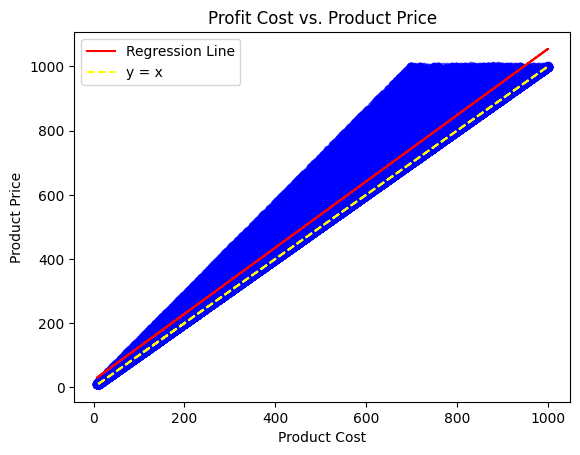

In [37]:
plt.scatter(productfinancials_df["ProductCost"], productfinancials_df["ProductPrice"], color="blue", alpha=0.5)

# Fitting a regression line (using np.polyfit to get the line equation)
slope, intercept = np.polyfit(productfinancials_df["ProductCost"], productfinancials_df["ProductPrice"], 1)
plt.plot(productfinancials_df["ProductCost"], slope * productfinancials_df["ProductCost"] + intercept, color="red", label="Regression Line")

# Plotting the y = x line
plt.plot(productfinancials_df["ProductCost"], productfinancials_df["ProductCost"], color="yellow", linestyle="--", label="y = x")

# Titles and labels
plt.title("Profit Cost vs. Product Price")
plt.xlabel("Product Cost")
plt.ylabel("Product Price")

plt.legend()
plt.show()


In [35]:
print(productfinancials_df.describe())

        ProductCost  ProductPrice        Profit  ProfitMargin
count  38213.000000  38213.000000  38213.000000  38213.000000
mean     465.679518    503.097126     37.417608      0.074488
std      271.014141    286.080256     60.219161      0.097745
min        7.580000     10.030000      0.000000      0.000000
25%      232.270000    254.210000      0.000000      0.000000
50%      458.200000    502.670000      0.000000      0.000000
75%      688.410000    752.180000     55.610000      0.150000
max      999.810000    999.970000    299.790000      0.300000


Instead of graphing every single product category, let's take a look at the big picture, and zoom into any interesting results. The following is a bar graph that shows the average profit margin of each product category (Books, Clothing, Electronics, Groceries, Health & Beauty, Home & Kitchen).

In [31]:
retail_df['ProfitMargin'] = (retail_df['ProductPrice'] - retail_df['ProductCost']) / retail_df['ProductPrice']
avg_profit_margin_by_category = retail_df.groupby('ProductCategory')['ProfitMargin'].mean().reset_index()
avg_profit_margin_by_category.head(6)

,ProductCategory,ProfitMargin
0,Books,0.073247
1,Clothing,0.074093
2,Electronics,0.074317
3,Groceries,0.075117
4,Health & Beauty,0.076269
5,Home & Kitchen,0.073888


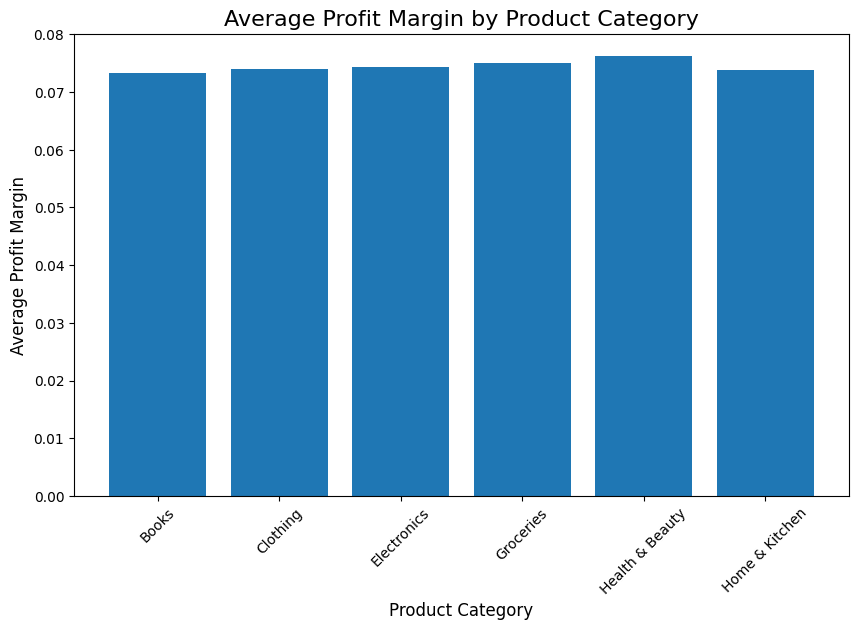

In [38]:
plt.figure(figsize=(10, 6))
plt.bar(avg_profit_margin_by_category['ProductCategory'], avg_profit_margin_by_category['ProfitMargin'])

# Titles and labels
plt.title('Average Profit Margin by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Profit Margin', fontsize=12)
plt.xticks(rotation=45) 
plt.show()

From the Average Profit Margin by Product Category bar graph, we can see that the average profit margins are relatively the same. The most profitable category is the Health & Beauty category, which makes sense as those products are often more luxurious. The Books category has lower average marginal profits, possibly for a few reasons:
- Books are often printed in bulk for lower production costs, but this large supply decreases prices, limiting the profit margin.
- Physical books may be heavier than things like clothing or groceries, meaning the shipping costs may be eating into profits.

There are also a few reasons as to why average profit margins are so similar across these different categories:
- The data may be unreliable/inaccurate
- The businesses selling products from these different categories may have similar pricing and cost strategies. Either by choice, or perhaps certain government regulations lead businesses to chosing this specific strategy
- Although the bar graph shows that profit margins are similar across the 6 categories, it doesn't show us data that might demonstrate category-specific differences such as marketing efforts or seasonality.

Let's take a look at average marketing expenditure by product category:


In [80]:
query = "SELECT * FROM product_avg_marketing"
productavgmarket_df = pd.read_sql(query, engine)
productavgmarket_df.head()

,ProductCategory,AverageMarketingExpenditure
0,Health & Beauty,4948.662232
1,Groceries,5032.650925
2,Electronics,4981.213740
3,Books,5071.671456
4,Home & Kitchen,5060.746310


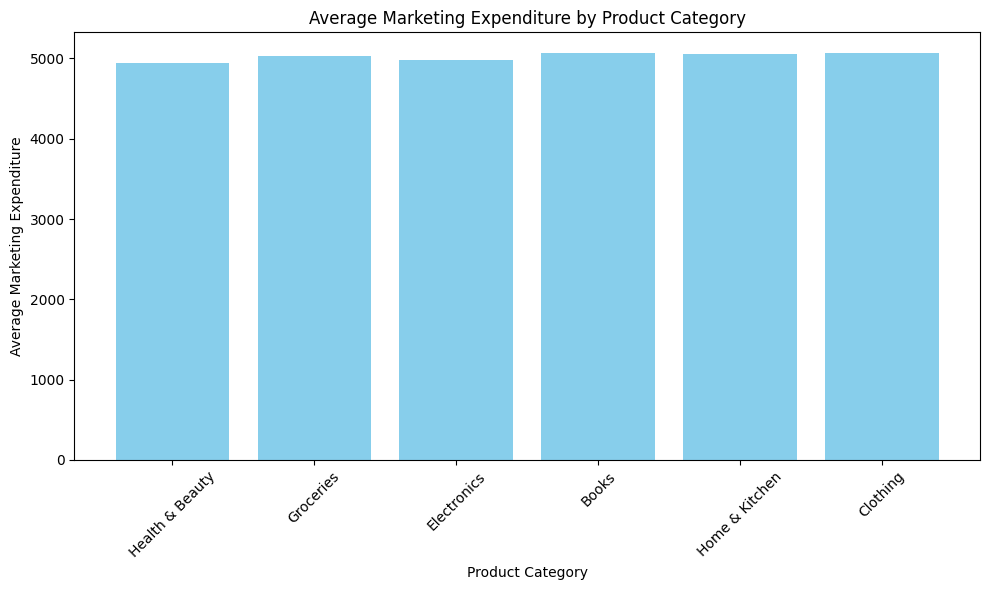

In [81]:
plt.figure(figsize=(10,6))
plt.bar(productavgmarket_df['ProductCategory'], productavgmarket_df['AverageMarketingExpenditure'], color='skyblue')

# Title and labels
plt.title('Average Marketing Expenditure by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Marketing Expenditure')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Once again, there's not much difference between the categories! However, we can notice that the average marketing expenditure of the Books category is higher than that of the Health & Beauty category. This could explain why Books had smaller profit margins than Health & Beauty, because more was being spent on marketing. 

Let's look at time and profit margins.

In [82]:
query = "SELECT * FROM ProfitMarginByDate"
pm_by_date_df = pd.read_sql(query, engine)
pm_by_date_df.head()

,PurchaseDate,ProfitMargin
0,2022-06-11,0.26
1,2023-06-05,0.01
2,2020-10-14,0.00
3,2021-08-27,0.00
4,2023-06-06,0.00


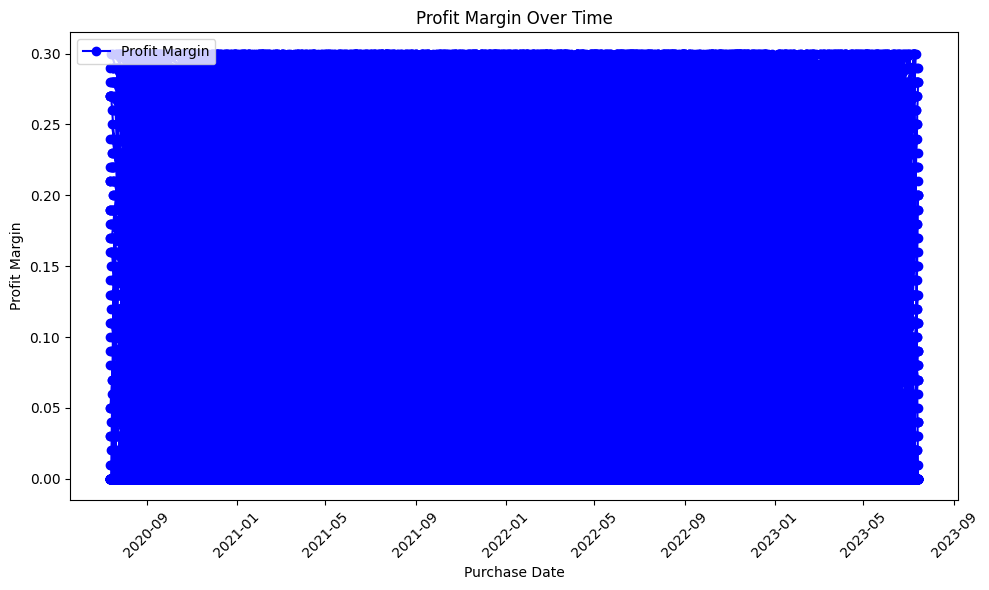

In [83]:
plt.figure(figsize=(10,6))
plt.plot(pm_by_date_df['PurchaseDate'], pm_by_date_df['ProfitMargin'], marker='o', linestyle='-', color='b', label='Profit Margin')

# Adding title and labels
plt.title('Profit Margin Over Time')
plt.xlabel('Purchase Date')
plt.ylabel('Profit Margin')

# Format x-axis to display dates better
plt.xticks(rotation=45)

plt.tight_layout()
plt.legend()
plt.show()

This time plot doesn't tell us anything, so let's zoom into one specific year. Since 2023 doesn't have data on all the months, let's choose the next most recent year: 2022, and find the monthly average profit margins.

In [84]:
df_2022 = pm_by_date_df[pm_by_date_df['PurchaseDate'].dt.year == 2022].copy()  # Ensure this is a proper copy
df_2022['YearMonth'] = df_2022['PurchaseDate'].dt.to_period('M')
monthly_avg_profit_margin = df_2022.groupby('YearMonth')['ProfitMargin'].mean()
print(monthly_avg_profit_margin)


YearMonth
2022-01    0.074241
2022-02    0.075253
2022-03    0.077968
2022-04    0.076314
2022-05    0.071610
2022-06    0.077498
2022-07    0.076530
2022-08    0.076877
2022-09    0.074113
2022-10    0.075378
2022-11    0.072773
2022-12    0.073400
Freq: M, Name: ProfitMargin, dtype: float64


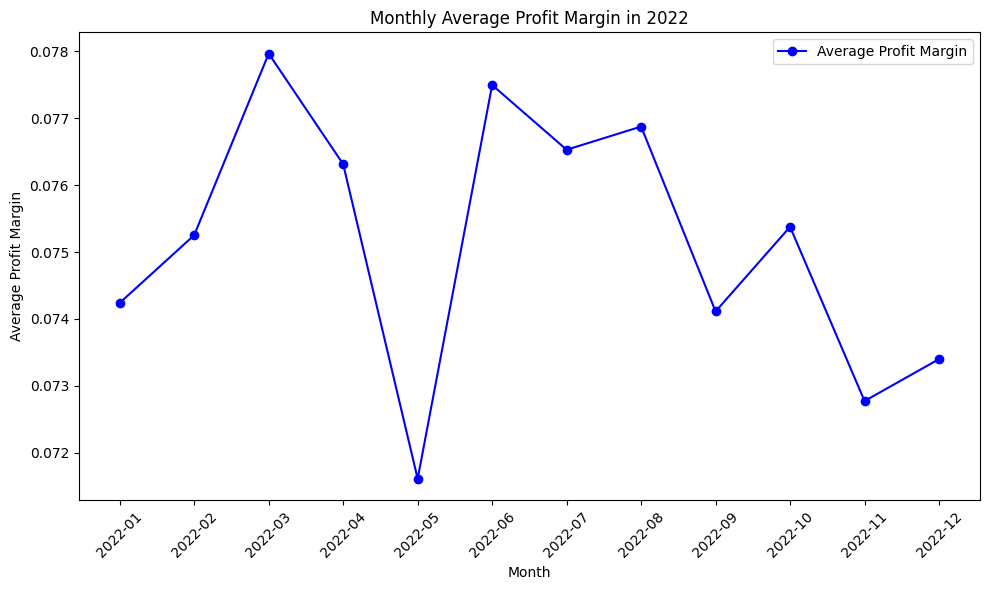

In [85]:
plt.figure(figsize=(10,6))
plt.plot(monthly_avg_profit_margin.index.astype(str), monthly_avg_profit_margin.values, marker='o', linestyle='-', color='b', label='Average Profit Margin')

# Title and labels
plt.title('Monthly Average Profit Margin in 2022')
plt.xlabel('Month')
plt.ylabel('Average Profit Margin')
plt.xticks(rotation=45)

plt.tight_layout()
plt.legend()
plt.show()

The graph tells us that the firms in the retail data dataset experience the greatest average profit margins in the beginning of March, and the lowest average profit margins at the start of May. There are some possible explanations for this:
- March could mark the beginning of many of these firms' spring sales
- On the other hand, May is a transitional period between spring and summer, with firms seeing lower sales because summer sales have not begun yet, and spring sales have ended.
- The previous point also explains why average profit margins are high in June.
- There are many category-specific explanations. For example, the Groceries category may see decreases in average profit margin in May because of planting seasons & lack of harvesting.

<br> Another approach to deciphering the Profit Margin over Time graph is to take the monthly rolling averages of profit margins, as shown below:

In [27]:
query = "SELECT Month, RollingAvgProfitMargin FROM MonthlyRollingProfitMargin"
rolling_margin_df = pd.read_sql(query, engine)
rolling_margin_df.head()

,Month,RollingAvgProfitMargin
0,2020-07,0.073057
1,2020-08,0.075585
2,2020-09,0.074604
3,2020-10,0.075651
4,2020-11,0.074389


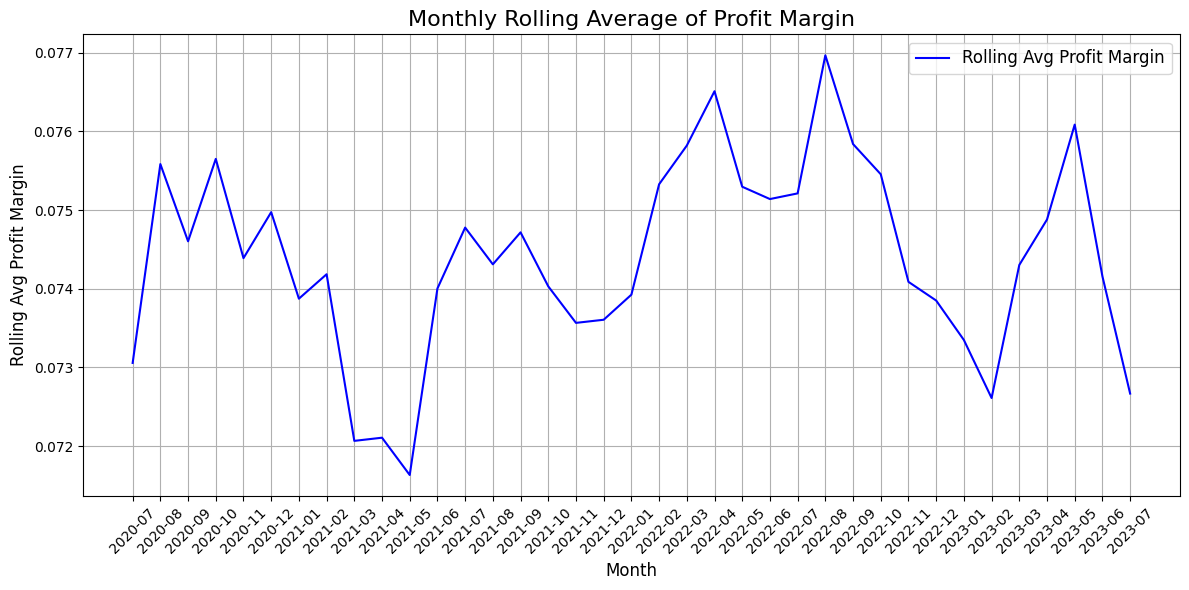

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(rolling_margin_df['Month'], rolling_margin_df['RollingAvgProfitMargin'], label='Rolling Avg Profit Margin', color='blue')
plt.title('Monthly Rolling Average of Profit Margin', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Rolling Avg Profit Margin', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

The graph reveals the overall trend of profit margins rising in the months of june to october, and dipping in the other months. From 2020 to 2023, the year 2022 experienced the highest profit margins.


In [21]:
query = "SELECT * FROM numerical_data"
numerical_df = pd.read_sql(query, engine)
numerical_df.head()

,Age,AnnualIncome,SpendingScore,ProductPrice,DiscountApplied,DiscountPercent,ProductCost,Profit,FootTraffic,InventoryLevel,MarketingExpenditure,CompetitorPrice
0,58,60038,41,147.43,1.0,26,109.10,38.33,336,26,9107.90,171.55
1,57,31577,91,402.09,1.0,1,398.07,4.02,491,32,1746.77,419.19
2,39,117404,26,958.45,0.0,0,958.45,0.00,157,3,2030.49,835.92
3,33,87434,94,544.17,0.0,0,544.17,0.00,223,87,6242.68,620.36
4,18,90225,10,645.75,0.0,0,645.75,0.00,315,8,6008.89,600.49


To end this project, I'd like to zoom out of things. We have analyzed many individual relationships between the columns in the retail_data dataset. However, it is easy to get lost in the details and lose track of the big picture. As the last visual of the project, I've included a correlation matrix of all the numerical data in the dataset. Evidentally, there is still much to be explored and learned from this dataset. I hope that my analysis has allowed you to gain a deeper understanding of the dataset or of certain microeconomics concepts. The purpose of the correlation matrix is to encourage you to question both the dataset and my findings. Perhaps the correlation coefficients don't quite match up to the conclusions we reached. Maybe we haven't explored some of these relationships, and the correlation coefficients confuse you. As my first project, my work cannot be said to be flawless. I wasn't able to import as many records as I wanted to, some categories were suspiciously derived, and navigating between MySQL and Jupyter Notebook was time-consuming. However, there were also many positives. The dataset had a variety of interesting and useful columns, allowing me to experiment with a multitude of visualizations. Namely, I was able to use choropleth maps, correlation matrices, and multiple line graphs. I hope to explore more of these relationships in a future project, possibly with a different dataset.

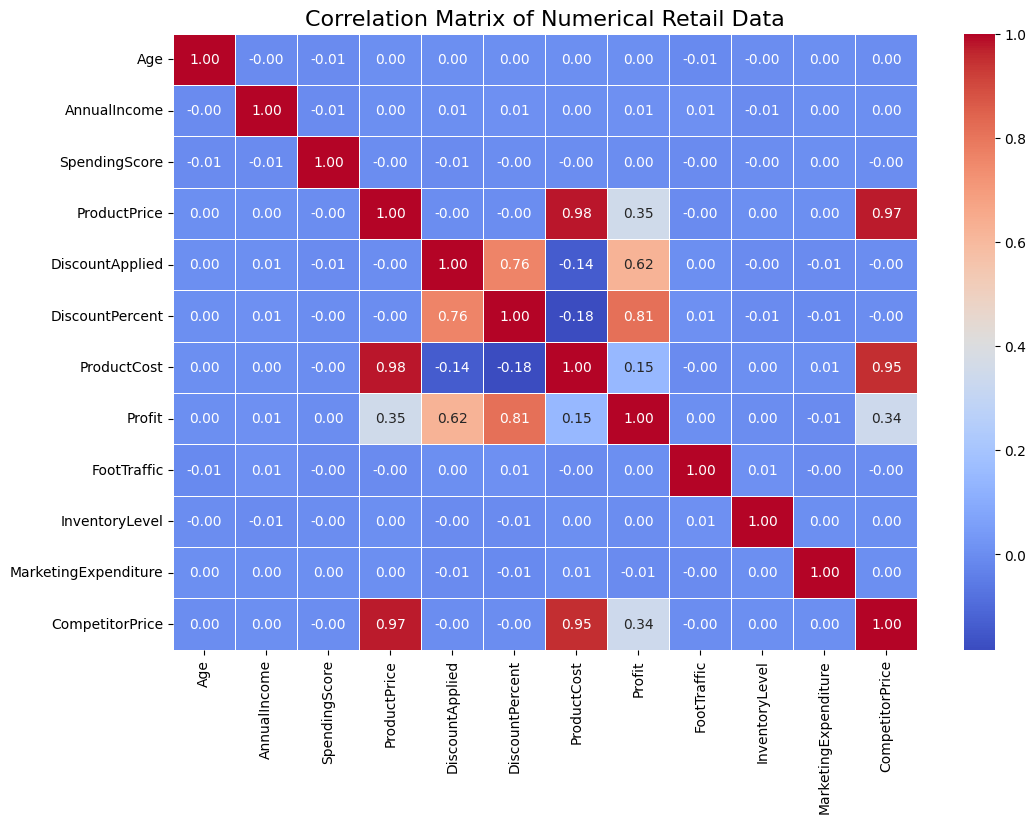

In [22]:
# Calculating correlation matrix (explain what it is, correlation coefficient)
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5
)
plt.title("Correlation Matrix of Numerical Retail Data", fontsize=16)
plt.show()